### Importing libraries 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

### Reading data

In [2]:
bank=pd.read_excel("bank.xlsx")

In [5]:
bank.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0


In [6]:
# age : Age of a applicant at a time of application
# ed : Education level ( 1- School, 2-college, 3-Post Grad, 4- Others)
# employ : Experience ( in years)
# income : income ( income in K)
# debtinc : debt to income ration ( 20 debt / 80 income = .25 or 25)
# creddebt : Credit loan
# Othdebt : Other debts
# Default : whether guy has defaulted or not defaulted  ( 1: fraud , 0: no fraud)

### EDA(exploratory data analysis)

In [7]:
bank["default"].value_counts(dropna=False)

0.0    517
1.0    183
NaN    150
Name: default, dtype: int64

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    float64
 1   ed        850 non-null    float64
 2   employ    850 non-null    float64
 3   address   850 non-null    float64
 4   income    850 non-null    float64
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(9)
memory usage: 59.9 KB


In [9]:
new_cust=bank[bank["default"].isnull()]

In [10]:
new_cust.shape

(150, 9)

In [11]:
hist=bank[~bank["default"].isnull()]

In [12]:
hist.shape

(700, 9)

In [13]:
hist.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [14]:
# EDA
# Univariate Analysis 

In [15]:
hist.describe(percentiles=[0.01, 0.02,0.03, 0.04, 0.05, 0.1, .25, .5, .75, .9, .95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,700.0,34.860000,7.997342,20.000000,21.000000,22.000000,22.000000,23.000000,23.000000,25.000000,29.000000,34.000000,40.000000,46.000000,49.000000,50.000000,51.000000,52.000000,53.010000,56.00000
ed,700.0,1.722857,0.928206,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000
employ,700.0,8.388571,6.658039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,12.000000,18.000000,21.050000,22.000000,23.000000,24.000000,27.010000,31.00000
address,700.0,8.278571,6.824877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,12.000000,18.000000,22.000000,23.000000,24.030000,25.020000,26.010000,34.00000
income,700.0,45.601429,36.814226,14.000000,15.000000,15.980000,16.000000,16.000000,17.000000,19.000000,24.000000,34.000000,55.000000,82.000000,113.000000,118.080000,129.000000,148.180000,190.300000,446.00000
debtinc,700.0,10.260571,6.827234,0.400000,0.900000,1.200000,1.600000,1.700000,1.900000,2.900000,5.000000,8.600000,14.125000,19.610000,23.800000,24.716000,25.709000,27.716000,30.701000,41.30000
creddebt,700.0,1.553553,2.117197,0.011696,0.030209,0.052661,0.072870,0.089062,0.107029,0.170020,0.369059,0.854869,1.901955,3.621504,5.098264,5.579937,6.236958,7.394810,9.891428,20.56131
othdebt,700.0,3.058209,3.287555,0.045584,0.160936,0.196423,0.259929,0.342751,0.376727,0.562232,1.044178,1.987568,3.923065,7.036180,9.501648,10.201442,11.728490,12.960384,17.184744,27.03360
default,700.0,0.261429,0.439727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [16]:
# Remove Outliers from data ( income ) 

In [17]:
y=hist["default"]
X=hist.drop(columns=["default"])

### splitting train and test data

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=99)

In [19]:
log=LogisticRegression(random_stat=99)

In [20]:
log.fit(X_train, y_train)

LogisticRegression()

In [21]:
print("Train Accuracy", log.score(X_train, y_train))

Train Accuracy 0.8


In [22]:
print("Test Accuracy", log.score(X_test, y_test))

Test Accuracy 0.8380952380952381


In [23]:
pred_y_train=log.predict(X_train)  # It predict Classes

In [24]:
pred_y_test=log.predict(X_test) # It predict Classes

In [25]:
print(metrics.classification_report(y_train, pred_y_train))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       356
         1.0       0.69      0.49      0.57       134

    accuracy                           0.80       490
   macro avg       0.76      0.70      0.72       490
weighted avg       0.79      0.80      0.79       490



In [26]:
(0.83*356+0.69*134)/(490)

0.7917142857142856

In [27]:
print(metrics.classification_report(y_test, pred_y_test))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       161
         1.0       0.69      0.55      0.61        49

    accuracy                           0.84       210
   macro avg       0.78      0.74      0.76       210
weighted avg       0.83      0.84      0.83       210



In [28]:
probs_train=pd.DataFrame(log.predict_proba(X_train), columns=["Prob_0", "Prob_1"]) # It predict Probability of 1 and 0
probs_test=pd.DataFrame(log.predict_proba(X_test), columns=["Prob_0", "Prob_1"]) # It predict Probability of 1 and 0
new_pred_y_train=np.where(probs_train["Prob_1"]>=0.27,1,0)
# new_pred_y_train
new_pred_y_test=np.where(probs_test["Prob_1"]>=0.27,1,0)
# new_pred_y_test
print(metrics.classification_report(y_train, new_pred_y_train))
print("++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(metrics.classification_report(y_test, new_pred_y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81       356
         1.0       0.53      0.78      0.63       134

    accuracy                           0.75       490
   macro avg       0.72      0.76      0.72       490
weighted avg       0.80      0.75      0.76       490

++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

         0.0       0.94      0.75      0.83       161
         1.0       0.51      0.86      0.64        49

    accuracy                           0.77       210
   macro avg       0.73      0.80      0.73       210
weighted avg       0.84      0.77      0.79       210



In [29]:
probs_train=pd.DataFrame(log.predict_proba(X_train), columns=["Prob_0", "Prob_1"]) # It predict Probability of 1 and 0
probs_test=pd.DataFrame(log.predict_proba(X_test), columns=["Prob_0", "Prob_1"]) # It predict Probability of 1 and 0
new_pred_y_train=np.where(probs_train["Prob_1"]>=0.16,1,0)
# new_pred_y_train
new_pred_y_test=np.where(probs_test["Prob_1"]>=0.16,1,0)
# new_pred_y_test
print(metrics.classification_report(y_train, new_pred_y_train))
print("++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(metrics.classification_report(y_test, new_pred_y_test))


              precision    recall  f1-score   support

         0.0       0.94      0.54      0.69       356
         1.0       0.43      0.90      0.58       134

    accuracy                           0.64       490
   macro avg       0.68      0.72      0.63       490
weighted avg       0.80      0.64      0.66       490

++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

         0.0       0.99      0.63      0.77       161
         1.0       0.45      0.98      0.62        49

    accuracy                           0.71       210
   macro avg       0.72      0.81      0.69       210
weighted avg       0.86      0.71      0.74       210



In [30]:
def profile_decile(X,y,trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    
    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    return profile
    

In [31]:
train_profile=profile_decile(X_train, y_train, log)

In [32]:
test_profile=profile_decile(X_test, y_test, log)

In [33]:
# train_profile.to_csv("train_profile.csv")
# test_profile.to_csv("test_profile.csv")

In [34]:
metrics.confusion_matrix(y_train, pred_y_train)

array([[327,  29],
       [ 69,  65]], dtype=int64)

In [35]:
print("TPr", (65/(65+69)))
print("FPr", (69/(65+69)))

TPr 0.48507462686567165
FPr 0.5149253731343284


In [36]:
ttconf=metrics.confusion_matrix(y_train, new_pred_y_train)

array([[194, 162],
       [ 13, 121]], dtype=int64)

In [37]:
print("TPr", (121/(121+13)))
print("FPr", (13/(121+13)))

TPr 0.9029850746268657
FPr 0.09701492537313433


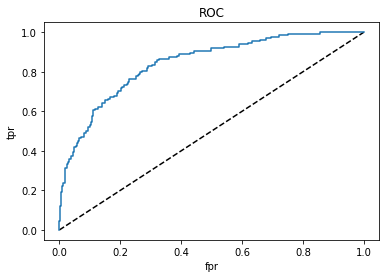

In [38]:

probs=log.predict_proba(X_train)[:,1]

fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logisticRegression')
plt.title("ROC")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [39]:
# AUC :Area under the curve 
metrics.roc_auc_score(y_train,probs)

0.8418790877075297

In [40]:
# def classification_eval(x,y,model):
#     accuray,
#     recall
#     precision
#     f1score,
#     AUc 
#     ROc
    

In [41]:
ttconf=metrics.confusion_matrix(y_train, new_pred_y_train)

In [46]:
ttconf

array([[194, 162],
       [ 13, 121]], dtype=int64)

In [47]:
ttconf[1][1]/ (ttconf[1][1]+ttconf[1][0])

0.9029850746268657

In [52]:
# def hjj(x,y,model):
#     x1=x.copy()
#     y1=y.copy()
#     pred=model.predict(x1)
#     conf=metrics.confusion_matrix(y1, pred)
#     recall=ttconf[1][1]/ (ttconf[1][1]+ttconf[1][0])
#     Pre=ttconf[1][1]/ (ttconf[1][1]+ttconf[0][1])
#     evaluation={"confusionMatrix": conf,
#         "Recall":recall, 
#                "Precision": Pre}
#     return evaluation
    
    

In [54]:
# hjj(X_train, y_train, log)

In [55]:
new_cust

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,NaN
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,NaN
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300,NaN
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000,NaN
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,NaN
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,NaN
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,NaN
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,NaN


In [57]:
X_train.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt'],
      dtype='object')

In [58]:
new_cust.drop(columns=["default"], inplace=True)

C:\Users\Archit\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
pd.DataFrame(log.predict_proba(new_cust)[:,1])

,0
0,0.015160
1,0.090345
2,0.648715
3,0.095001
4,0.368767
...,...
145,0.012245
146,0.098671
147,0.050579
148,0.284867


In [67]:
pred_new_fraud=np.where(log.predict_proba(new_cust)[:,1]>0.27,1,0)

In [68]:
pred_new_fraud.sum()

57

In [69]:
new_cust["Predicted"]=pred_new_fraud

<ipython-input-69-c8467f303bea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cust["Predicted"]=pred_new_fraud


In [70]:
new_cust

,age,ed,employ,address,income,debtinc,creddebt,othdebt,Predicted
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,0
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,0
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300,1
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000,0
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264,1
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,0
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,0
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,0
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,1


In [71]:
log.coef_

array([[ 0.02586362,  0.04560953, -0.22379409, -0.09330996, -0.007927  ,
         0.06844729,  0.56883957,  0.05980768]])

In [72]:
log.intercept_

array([-1.3347873])

In [81]:
yy=0.02586362*X_train["age"]+1.04560953*X_train["ed"]-0.22379409*X_train["employ"]-0.09330996*X_train["address"]-0.007927*X_train["income"]+0.06844729*X_train["debtinc"]+0.56883957*X_train["creddebt"]+0.05980768*X_train["othdebt"]-1.3347873
p=np.exp(yy)/(1+np.exp(yy))
p

478    0.001011
202    0.160505
46     0.012761
302    0.002466
598    0.335901
         ...   
68     0.203826
168    0.028946
185    0.044134
35     0.933062
641    0.004129
Length: 490, dtype: float64

In [88]:
yy=0.02586362*X_train["age"]+4.04560953*X_train["ed"]-.22379409*X_train["employ"]-0.09330996*X_train["address"]-0.007927*X_train["income"]+0.06844729*X_train["debtinc"]+0.56883957*X_train["creddebt"]+0.05980768*X_train["othdebt"]-1.3347873
p=np.exp(yy)/(1+np.exp(yy))
p

478    0.751077
202    0.999999
46     0.413750
302    0.118926
598    0.965054
         ...   
68     0.998691
168    0.999996
185    0.715979
35     0.999976
641    0.925140
Length: 490, dtype: float64

In [89]:
p

478    0.751077
202    0.999999
46     0.413750
302    0.118926
598    0.965054
         ...   
68     0.998691
168    0.999996
185    0.715979
35     0.999976
641    0.925140
Length: 490, dtype: float64

In [73]:
X_train

,age,ed,employ,address,income,debtinc,creddebt,othdebt
478,51.0,2.0,27.0,21.0,166.0,11.5,0.820870,18.269130
202,48.0,4.0,3.0,23.0,45.0,9.8,0.974610,3.435390
46,35.0,1.0,13.0,15.0,35.0,4.5,0.431550,1.143450
302,47.0,1.0,22.0,19.0,81.0,5.5,1.505790,2.949210
598,33.0,1.0,2.0,10.0,24.0,9.6,1.041408,1.262592
...,...,...,...,...,...,...,...,...
68,28.0,2.0,8.0,3.0,31.0,8.2,1.492154,1.049846
168,41.0,4.0,14.0,3.0,44.0,1.7,0.353056,0.394944
185,39.0,1.0,13.0,9.0,27.0,8.0,0.965520,1.194480
35,26.0,2.0,6.0,7.0,45.0,26.0,6.048900,5.651100


In [90]:
from joblib import dump , load